In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt



In [24]:
def plot_xyz_timeseries(time, data, ylabel, title):
    # Plot the time series
    fig, ax = plt.subplots(2,2, figsize=(12, 8))
    ax[0,0].plot(time, data['x'])
    ax[0,1].plot(time, data['y'])
    ax[1,0].plot(time, data['z'])
    data.plot(ax = ax[1,1], kind = 'kde', y=['x', 'y', 'z'] )
    ax[0,0].set_xlabel('time')
    ax[0,0].set_ylabel(ylabel)
    ax[0,0].legend(['X', 'Y', 'Z'])
    plt.show()

def zero_mean_df(df, exlude_time = False):
    if exlude_time:
        df_xyz = df.loc[:, df.columns != 'time']
        df_xyz = df_xyz- df_xyz.mean()
        df.loc[:, df.columns != 'time'] = df_xyz
    else:
        df = df - df.mean()
    return df

C:\Users\maril\AppData\Local\Temp\ipykernel_23040\2699629275.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("Plotting\\TestingData\\withpower.csv", sep = ', ', header=0)


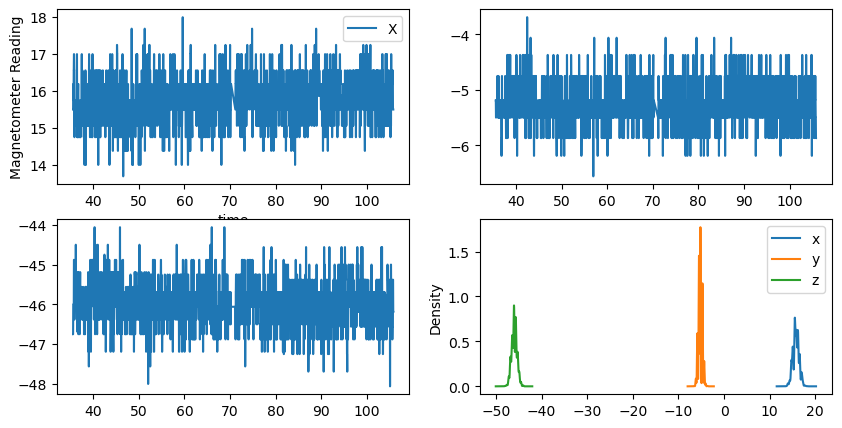

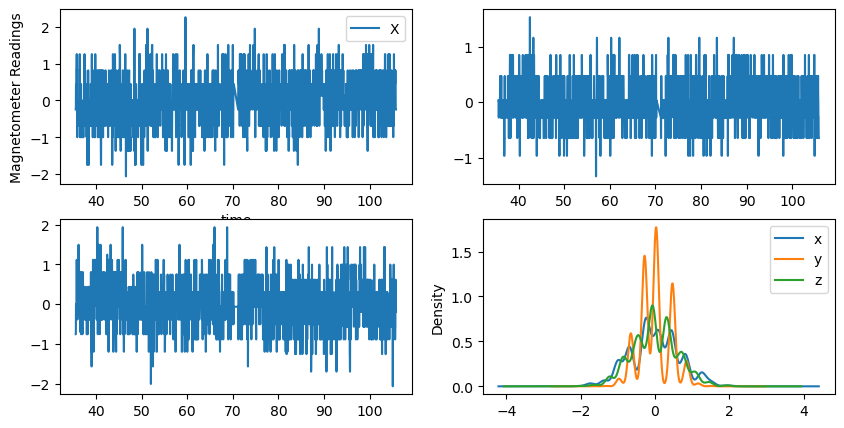

In [35]:
# Read in the CSV file containing magnetometer data
#data = pd.read_csv('test.txt', header=None, names=['x', 'y', 'z', 'time'])

data = pd.read_csv("Plotting\\TestingData\\withpower.csv", sep = ', ', header=0)
#timestamps = pd.read_csv('newtest//oneSetTimestamps.csv')

plot_xyz_timeseries(data['time'], data, 'Magnetometer Reading', 'Available magentometer time series data test.txt')

data = zero_mean_df(data, exlude_time = True)
plot_xyz_timeseries(data['time'], data, 'Magnetometer Readings', 'zero meaned')

#Devide timeseries into traning, test and validation set 
n = len(data.index)
n_train = n_test = n_val = n//3
data_train = data.iloc[0 : n_train]
data_test = data.iloc[n_train + 1 : n_train + n_test]
data_val = data.iloc[n_train + n_test + 1 :]



c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


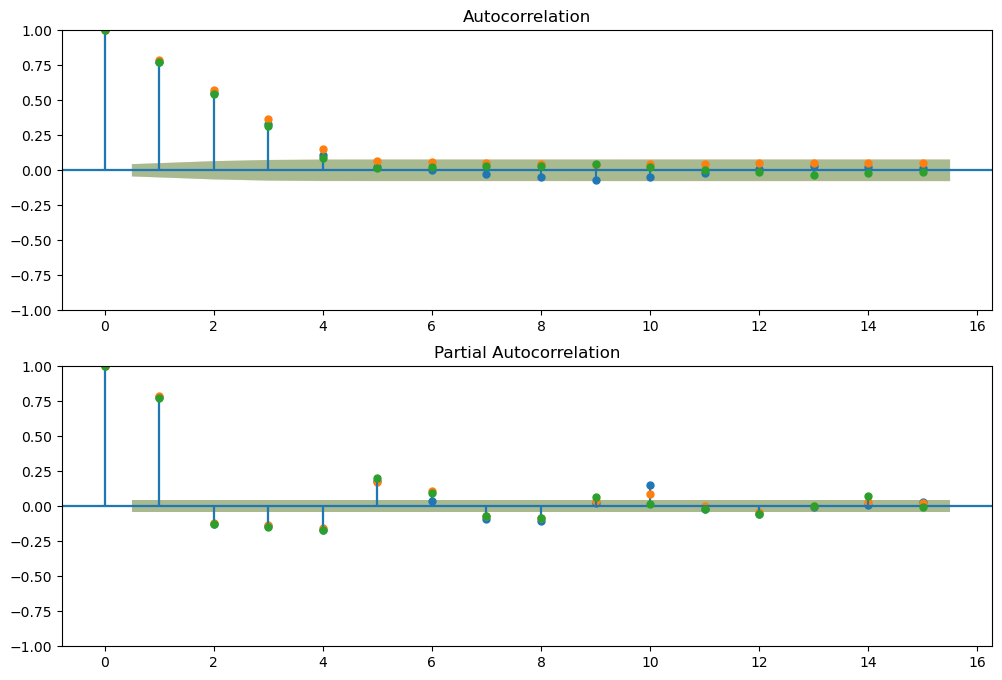

In [36]:
#plot autocorrelation
#train data on ARMA (zero meaning it!)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_train['x'].values.squeeze(), lags=15, ax=ax1)
fig = sm.graphics.tsa.plot_acf(data_train['y'].values.squeeze(), lags=15, ax=ax1)
fig = sm.graphics.tsa.plot_acf(data_train['z'].values.squeeze(), lags=15, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_train['x'], lags=15, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(data_train['y'], lags=15, ax=ax2)
fig = sm.graphics.tsa.plot_pacf(data_train['z'], lags=15, ax=ax2)
plt.show()

In [37]:
#AIC and BIC
order_aic_bic = []

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        # Create and fit ARMA(p, q) model
        model = SARIMAX(data_train['x'], order=(p, 0, q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\maril\anaconda3\envs\pythonProject\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


   p  q          AIC          BIC
8  2  2  2176.438639  2204.440650
5  1  2  2245.364346  2267.765955
6  2  0  2265.603418  2282.404625
4  1  1  2272.773805  2289.575012
7  2  1  2274.275868  2296.677477
3  1  0  2293.527114  2304.727919
2  0  2  2622.751937  2639.553144
1  0  1  2920.857197  2932.058002
0  0  0  4185.670754  4191.271156
   p  q          AIC          BIC
8  2  2  2176.438639  2204.440650
5  1  2  2245.364346  2267.765955
6  2  0  2265.603418  2282.404625
4  1  1  2272.773805  2289.575012
7  2  1  2274.275868  2296.677477
3  1  0  2293.527114  2304.727919
2  0  2  2622.751937  2639.553144
1  0  1  2920.857197  2932.058002
0  0  0  4185.670754  4191.271156


ARMA(2,2) Model Results:
                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 1999
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1076.466
Date:                Fri, 14 Apr 2023   AIC                           2164.931
Time:                        16:14:29   BIC                           2198.534
Sample:                             0   HQIC                          2177.270
                               - 1999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1118      0.030     -3.724      0.000      -0.171      -0.053
ar.L1          1.0786      0.083     12.927      0.000       0.915       1.242
ar.L2         -0.4205      

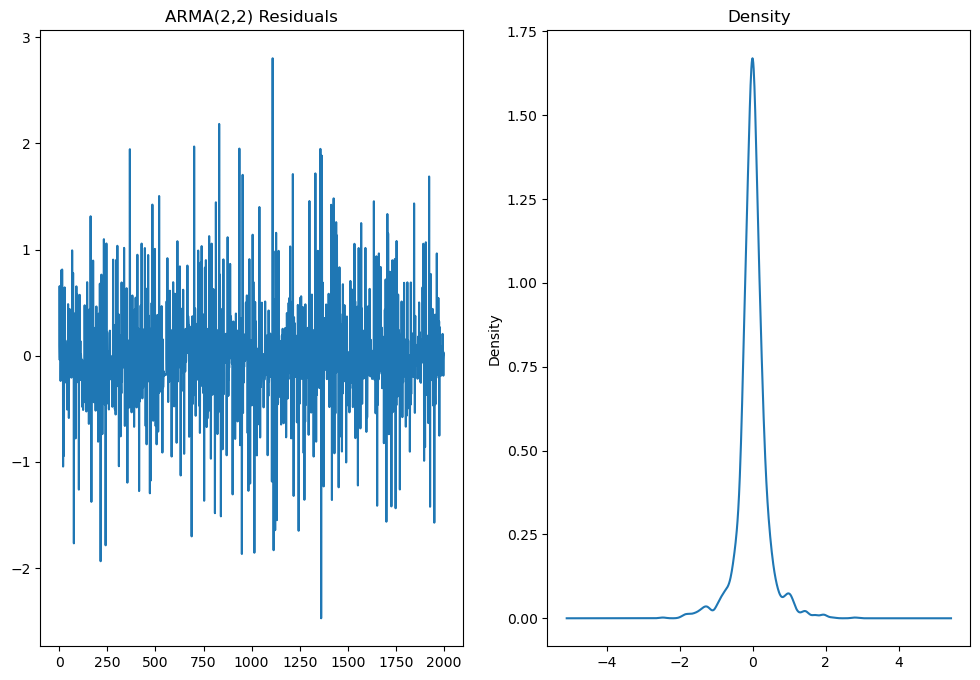

In [46]:
#Plot the best fitted ARMA model
p_best_aic = 2
q_best_aic = 2
arma_model = ARIMA(data_train['x'], order=(p_best_aic,0,q_best_aic))
arma_best_AIC = arma_model.fit()

# Print the model summary
print(f'ARMA({p},{q}) Model Results:\n{arma_best_AIC.summary()}\n')

# Plot the model residuals
residuals11 = arma_best_AIC.resid[1:]
fig, ax = plt.subplots(1,2)
residuals11.plot(title=f'ARMA({p_best_aic},{q_best_aic}) Residuals', ax=ax[0], figsize=(12, 8))
residuals11.plot(title='Density', kind='kde', ax=ax[1], figsize=(12, 8))
plt.show()
            
        

ARMA(2,2) Model Results:
                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 1999
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1114.459
Date:                Fri, 14 Apr 2023   AIC                           2238.917
Time:                        16:14:37   BIC                           2266.919
Sample:                             0   HQIC                          2249.199
                               - 1999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1118      0.038     -2.936      0.003      -0.186      -0.037
ar.L1          0.6728      0.030     22.647      0.000       0.615       0.731
ma.L1          0.1271      

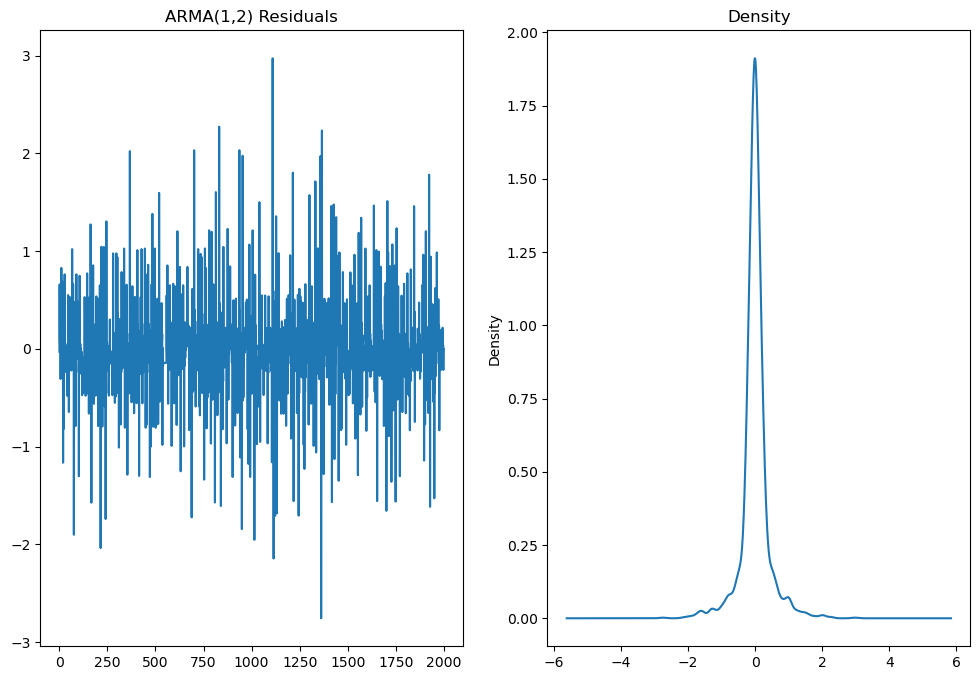

In [47]:
#Plot the best fitted ARMA model
p_2best_aic = 1
q_2best_aic = 2
arma_model = ARIMA(data_train['x'], order=(p_2best_aic,0,q_2best_aic))
arma_2best_aic = arma_model.fit()

# Print the model summary
print(f'ARMA({p},{q}) Model Results:\n{arma_2best_aic.summary()}\n')


residuals11 = arma_2best_aic.resid[1:]
fig, ax = plt.subplots(1,2)
residuals11.plot(title=f'ARMA({p_2best_aic},{q_2best_aic}) Residuals', ax=ax[0], figsize=(12, 8))
residuals11.plot(title='Density', kind='kde', ax=ax[1], figsize=(12, 8))
plt.show()


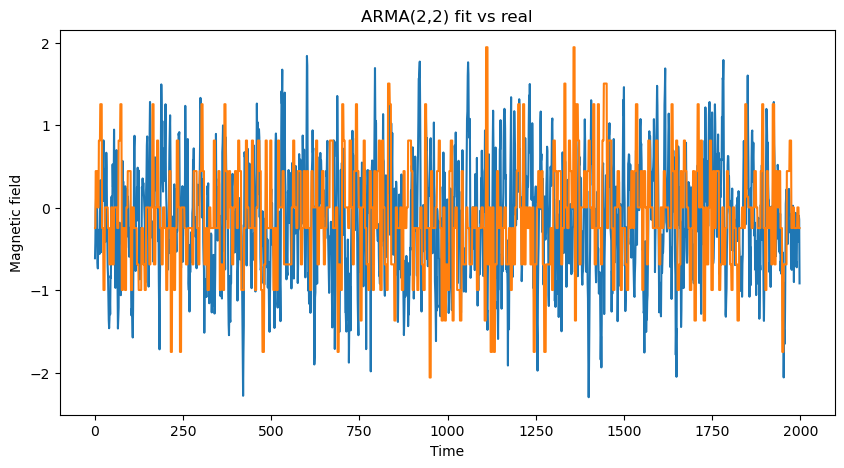

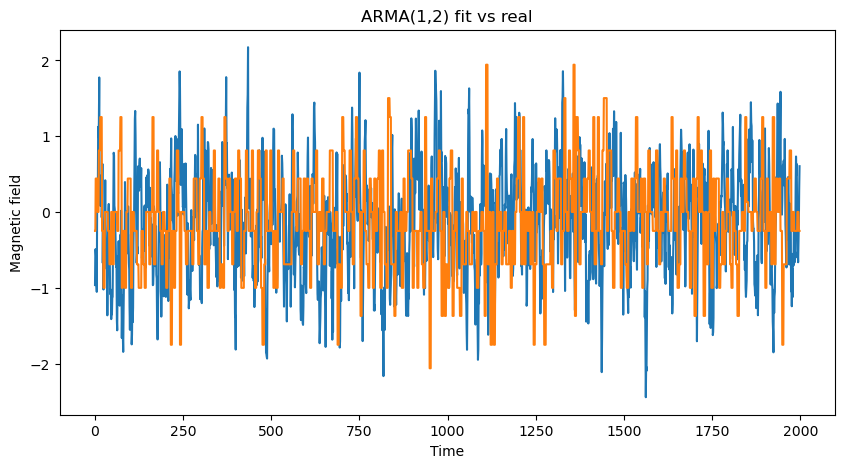

In [48]:
# Plot fitted model with real model
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(arma_best_AIC.simulate(data_train['x'].size))
ax.plot(data_train['x'])
ax.set_xlabel('Time')
ax.set_ylabel('Magnetic field')
ax.set_title(f'ARMA({p_best_aic},{q_best_aic}) fit vs real')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(arma_2best_aic.simulate(data_train['x'].size))
ax.plot(data_train['x'])
ax.set_xlabel('Time')
ax.set_ylabel('Magnetic field')
ax.set_title(f'ARMA({p_2best_aic},{q_2best_aic}) fit vs real')
plt.show()

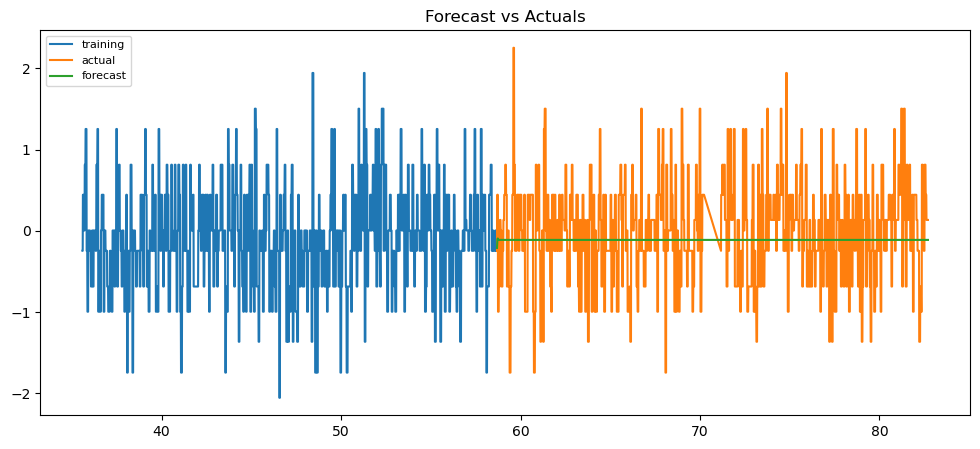

In [49]:
# test forecast on test set
forecast10 = arma_best_AIC.forecast(len(data_test['x']), alpha=0.05)
predict10 = arma_best_AIC.predict(len(data_test['x']), alpha=0.05)
# Make as pandas series
#fc_series = pd.Series(forecast10, index=data_test.index)
#lower_series = pd.Series(conf[:, 0], index=data_test.index)
#upper_series = pd.Series(conf[:, 1], index=data_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train['time'], data_train['x'], label='training')
plt.plot(data_test['time'], data_test['x'], label='actual')
#plt.plot(data_test['time'], predict10, label='prediction')
plt.plot(data_test['time'], forecast10, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(forecast10)
#ax.plot(data_test['x'])
#ax.set_xlabel('Time')
#ax.set_ylabel('Magnetic field')
#ax.set_title(f'Forecast on ARMA(1,0) vs real')
#ax.legend(['forecast', 'test set'])
#plt.show()
